# Credit Card Fraud Detection Project

In [17]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   - -------------------------------------- 1.0/36.4 MB 3.6 MB/s eta 0:00:10
   -- ------------------------------------- 1.8/36.4 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.6/36.4 MB 3.9 MB/s eta 0:00:09
   ---- ----------------------------------- 3.7/36.4 MB 3.9 MB/s eta 0:00:09
   ----- ---------------------------------- 4.7/36.4 MB 4.1 MB/s eta 0:00:08
   ----- ---------------------------------- 5.2/36.4 MB 4.0 MB/s eta 0:00:08
   ------ --------------------------------- 6.3/36.4 MB 4.1 MB/s eta 0:00:08
   -------- ------------------------------- 7.3/36.4 MB 4.2 MB/s eta 0:00:07
   -------- ------------------------------- 8.1/36.4 MB 4.1 MB/s eta 0:00:07
   --------- ------------------------------ 8.9/36.4 MB 4.2 MB/s eta 0:00:07
   ----------- ---------------------------- 10.2/36.4 MB 4.2 MB/s eta 0:00:07
   ---------

In [9]:
import pandas as pd


In [10]:
data=pd.read_csv('creditcard.csv')

In [11]:
# Data Exploration
print("Dataset Shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nClass Distribution:")
print(data['Class'].value_counts())
print("\nBasic Statistics:")
print(data.describe())

Dataset Shape: (284807, 31)

First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -

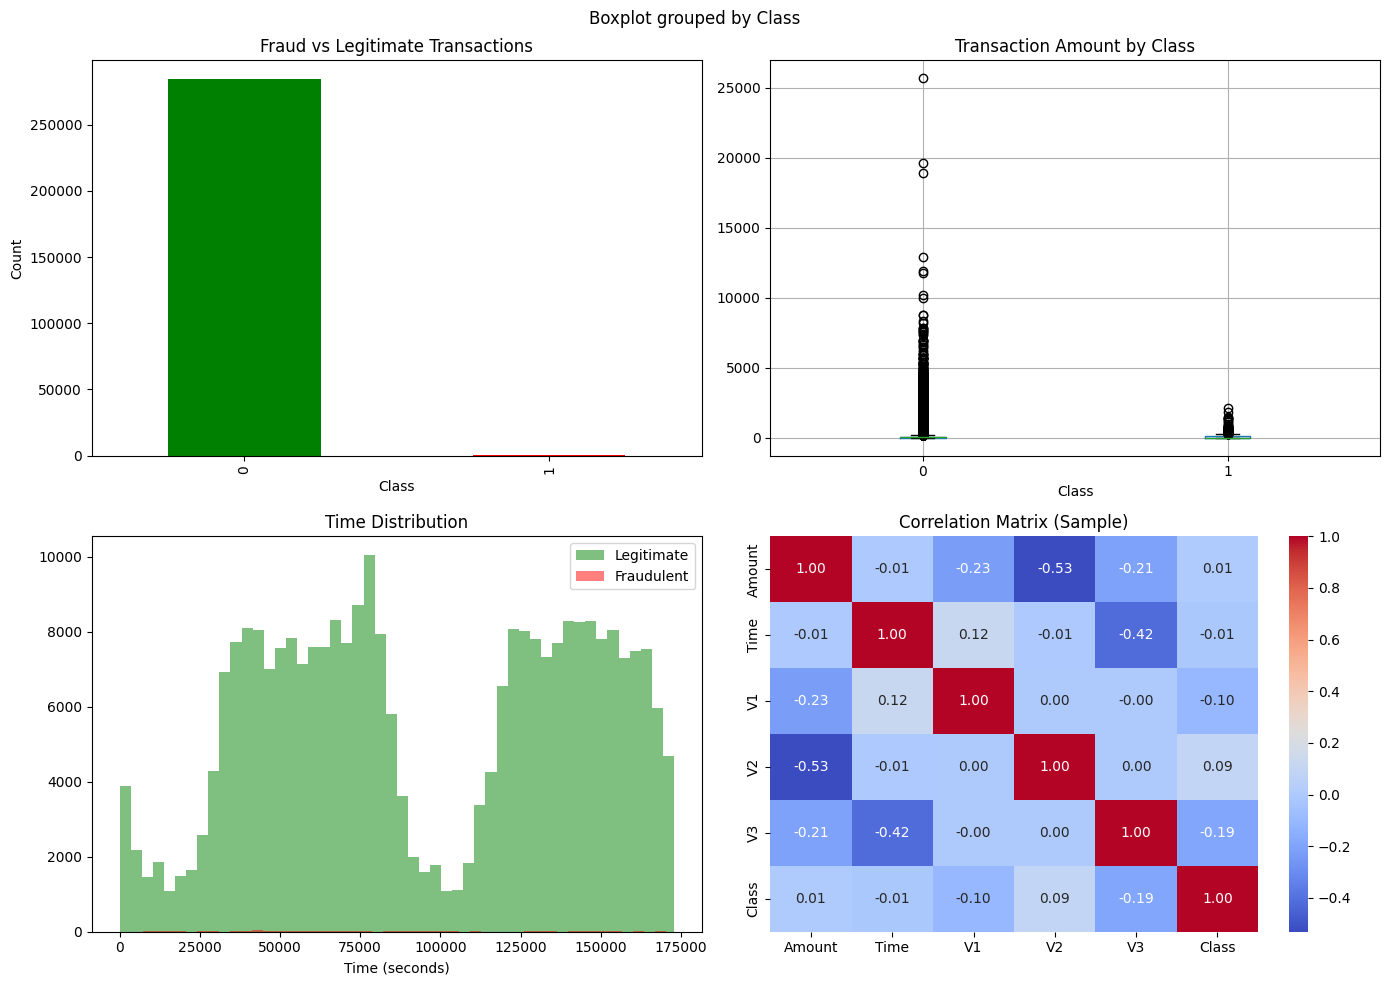

Fraud Rate: 0.17%


In [18]:
# Data Visualization - Part 1: Basic Overview
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Class distribution
data['Class'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'red'])
axes[0, 0].set_title('Fraud vs Legitimate Transactions')
axes[0, 0].set_ylabel('Count')

# Amount distribution by class
data.boxplot(column='Amount', by='Class', ax=axes[0, 1])
axes[0, 1].set_title('Transaction Amount by Class')

# Time distribution
axes[1, 0].hist(data[data['Class']==0]['Time'], bins=50, alpha=0.5, label='Legitimate', color='green')
axes[1, 0].hist(data[data['Class']==1]['Time'], bins=50, alpha=0.5, label='Fraudulent', color='red')
axes[1, 0].set_title('Time Distribution')
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].legend()

# Correlation heatmap (sample)
corr_cols = ['Amount', 'Time', 'V1', 'V2', 'V3', 'Class']
sns.heatmap(data[corr_cols].corr(), annot=True, fmt='.2f', ax=axes[1, 1], cmap='coolwarm')
axes[1, 1].set_title('Correlation Matrix (Sample)')

plt.tight_layout()
plt.show()

print(f"Fraud Rate: {(data['Class'].sum() / len(data)) * 100:.2f}%")


In [14]:
import numpy as np

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


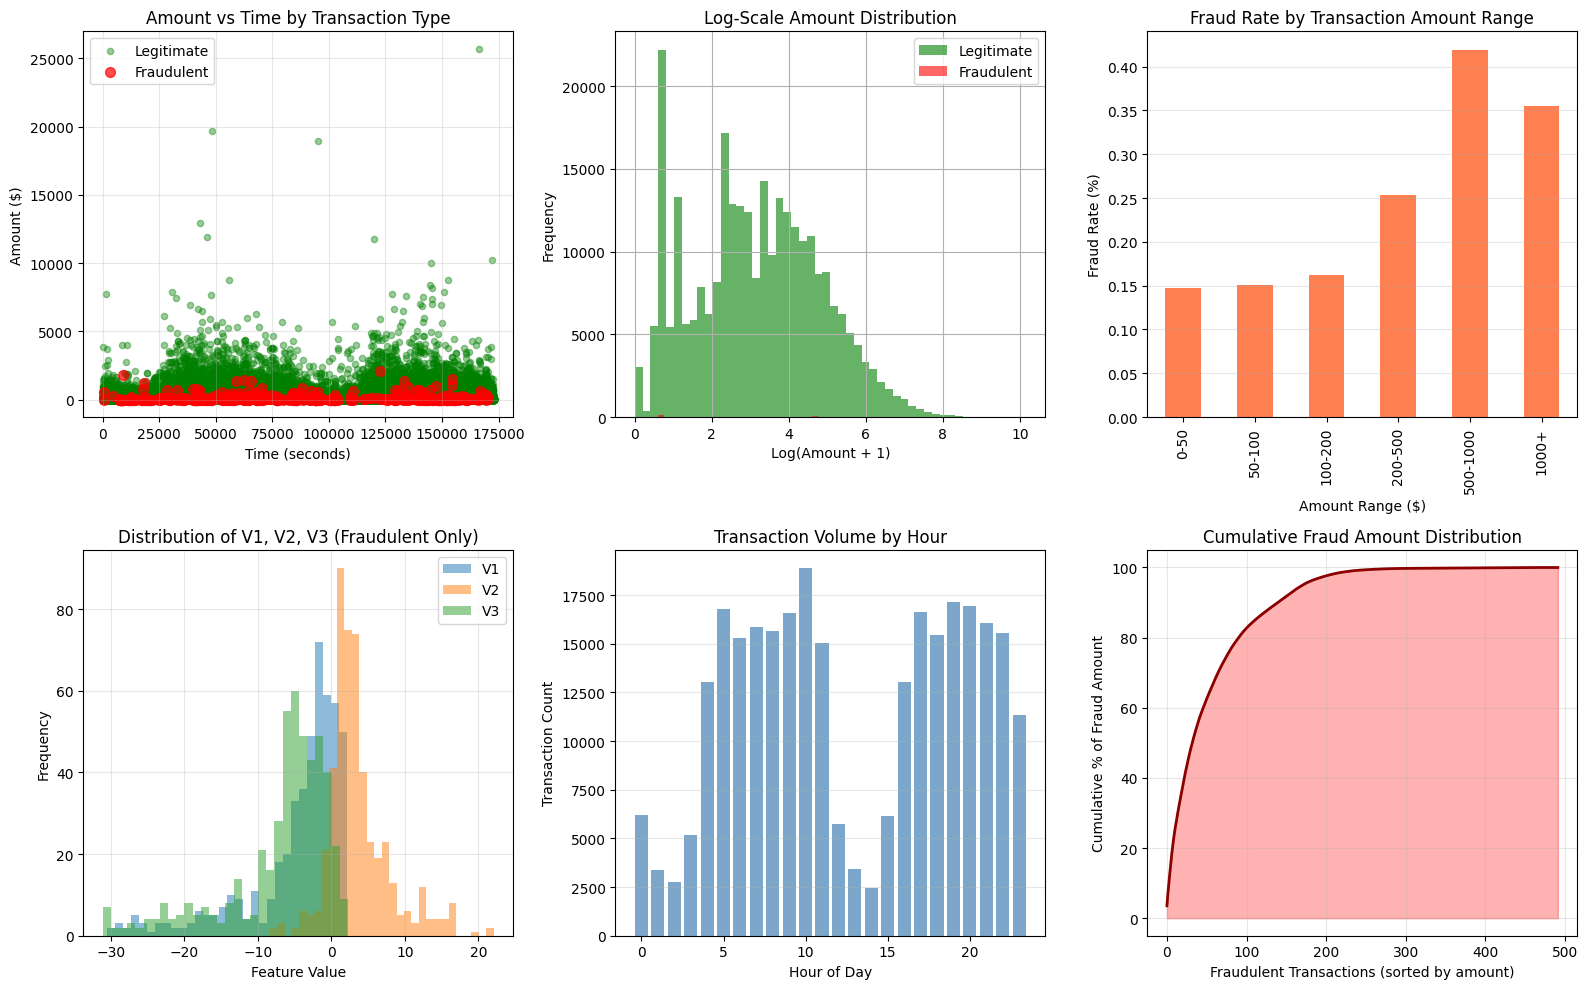

Advanced visualizations completed!


In [20]:
# Data Visualization - Part 2: Advanced & Unique Visualizations

# 1. Amount vs Time colored by Class
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

ax1 = axes[0, 0]
scatter = ax1.scatter(data[data['Class']==0]['Time'], 
                      data[data['Class']==0]['Amount'], 
                      alpha=0.4, s=20, c='green', label='Legitimate')
ax1.scatter(data[data['Class']==1]['Time'], 
            data[data['Class']==1]['Amount'], 
            alpha=0.7, s=50, c='red', label='Fraudulent')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amount ($)')
ax1.set_title('Amount vs Time by Transaction Type')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Log-scaled Amount distribution
ax2 = axes[0, 1]
data[data['Class']==0]['Amount'].apply(lambda x: np.log1p(x)).hist(bins=50, alpha=0.6, label='Legitimate', ax=ax2, color='green')
data[data['Class']==1]['Amount'].apply(lambda x: np.log1p(x)).hist(bins=50, alpha=0.6, label='Fraudulent', ax=ax2, color='red')
ax2.set_xlabel('Log(Amount + 1)')
ax2.set_ylabel('Frequency')
ax2.set_title('Log-Scale Amount Distribution')
ax2.legend()

# 3. Fraud rate by Amount ranges
ax3 = axes[0, 2]
amount_bins = pd.cut(data['Amount'], bins=[0, 50, 100, 200, 500, 1000, 2600], 
                     labels=['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+'])
fraud_by_amount = data.groupby(amount_bins)['Class'].agg(['sum', 'count'])
fraud_by_amount['fraud_rate'] = (fraud_by_amount['sum'] / fraud_by_amount['count']) * 100
fraud_by_amount['fraud_rate'].plot(kind='bar', ax=ax3, color='coral')
ax3.set_title('Fraud Rate by Transaction Amount Range')
ax3.set_ylabel('Fraud Rate (%)')
ax3.set_xlabel('Amount Range ($)')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Distribution comparison of V1, V2, V3 for fraudulent transactions
ax4 = axes[1, 0]
for col in ['V1', 'V2', 'V3']:
    ax4.hist(data[data['Class']==1][col], bins=30, alpha=0.5, label=col)
ax4.set_title('Distribution of V1, V2, V3 (Fraudulent Only)')
ax4.set_xlabel('Feature Value')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Transaction count by hour of day
ax5 = axes[1, 1]
transactions_per_hour = data.groupby(pd.cut(data['Time'], bins=24))['Class'].count()
hours = range(24)
ax5.bar(hours, transactions_per_hour.values, color='steelblue', alpha=0.7)
ax5.set_xlabel('Hour of Day')
ax5.set_ylabel('Transaction Count')
ax5.set_title('Transaction Volume by Hour')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Cumulative fraud percentage
ax6 = axes[1, 2]
fraud_data = data[data['Class']==1].sort_values('Amount', ascending=False)
cumulative_fraud_amount = fraud_data['Amount'].cumsum()
cumulative_fraud_pct = (cumulative_fraud_amount / fraud_data['Amount'].sum()) * 100
ax6.plot(range(len(cumulative_fraud_pct)), cumulative_fraud_pct.values, linewidth=2, color='darkred')
ax6.fill_between(range(len(cumulative_fraud_pct)), cumulative_fraud_pct.values, alpha=0.3, color='red')
ax6.set_xlabel('Fraudulent Transactions (sorted by amount)')
ax6.set_ylabel('Cumulative % of Fraud Amount')
ax6.set_title('Cumulative Fraud Amount Distribution')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Advanced visualizations completed!")

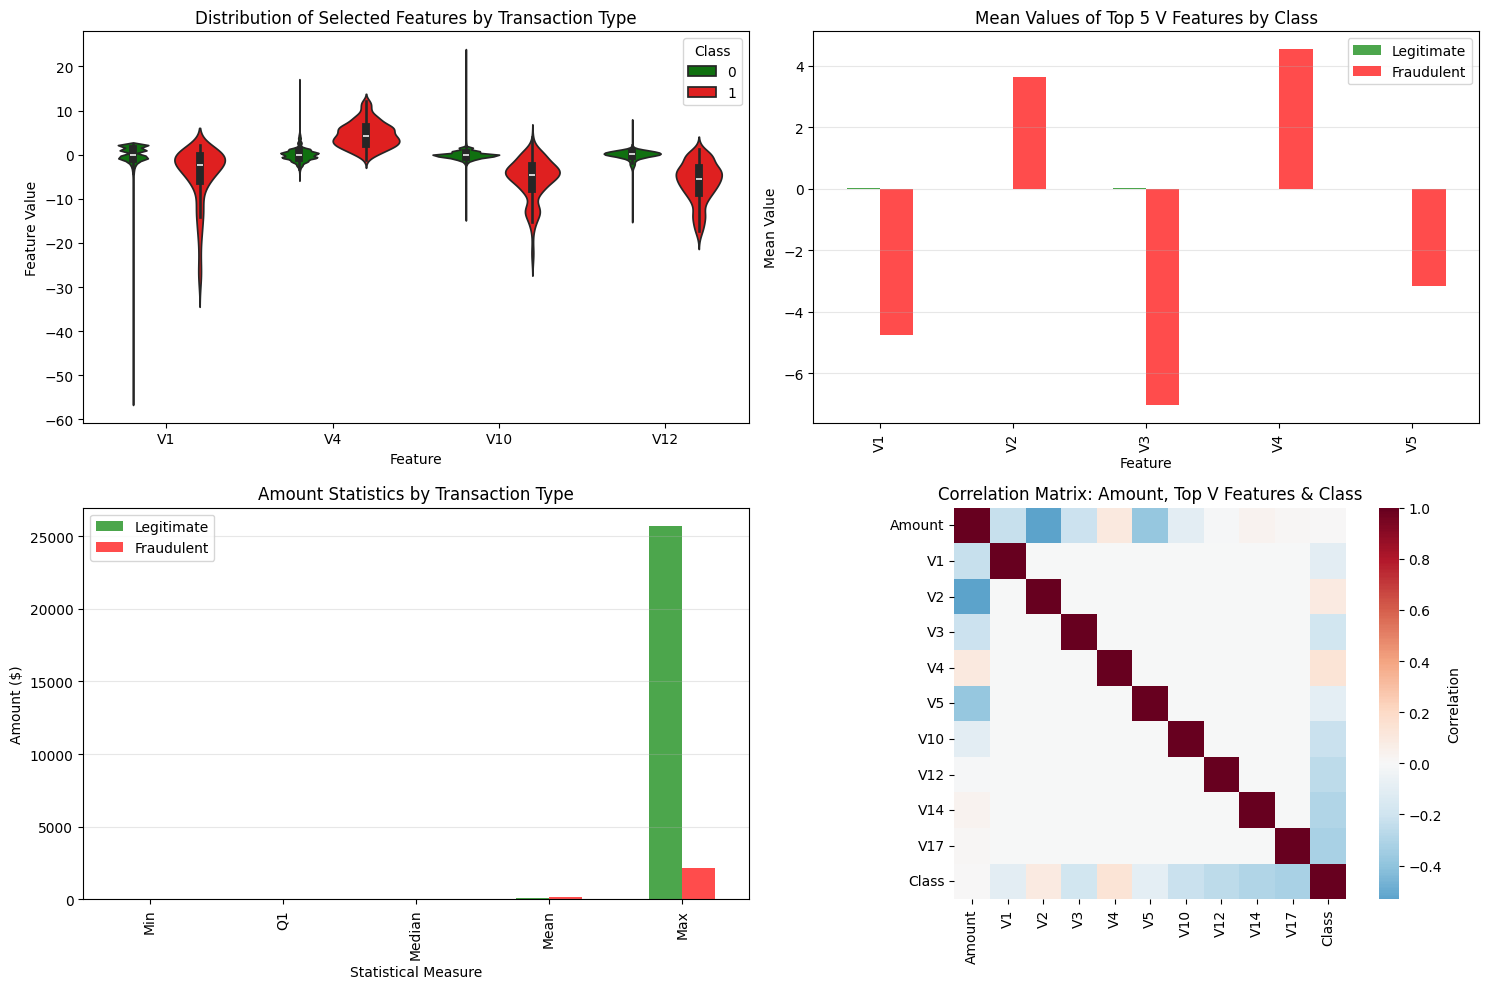

Feature-level analysis completed!


In [21]:
# Data Visualization - Part 3: Feature-level Analysis

import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Violin plot of selected features by Class
ax1 = axes[0, 0]
features_to_plot = ['V1', 'V4', 'V10', 'V12']
data_melted = data[features_to_plot + ['Class']].melt(id_vars='Class', var_name='Feature', value_name='Value')
sns.violinplot(data=data_melted, x='Feature', y='Value', hue='Class', ax=ax1, palette=['green', 'red'])
ax1.set_title('Distribution of Selected Features by Transaction Type')
ax1.set_ylabel('Feature Value')

# 2. Feature means comparison (Fraud vs Legitimate)
ax2 = axes[0, 1]
feature_means = data.groupby('Class')[['V1', 'V2', 'V3', 'V4', 'V5']].mean()
feature_means.T.plot(kind='bar', ax=ax2, color=['green', 'red'], alpha=0.7)
ax2.set_title('Mean Values of Top 5 V Features by Class')
ax2.set_ylabel('Mean Value')
ax2.set_xlabel('Feature')
ax2.legend(['Legitimate', 'Fraudulent'])
ax2.grid(True, alpha=0.3, axis='y')

# 3. Amount statistics comparison
ax3 = axes[1, 0]
amount_stats = pd.DataFrame({
    'Legitimate': [data[data['Class']==0]['Amount'].min(),
                   data[data['Class']==0]['Amount'].quantile(0.25),
                   data[data['Class']==0]['Amount'].median(),
                   data[data['Class']==0]['Amount'].mean(),
                   data[data['Class']==0]['Amount'].max()],
    'Fraudulent': [data[data['Class']==1]['Amount'].min(),
                   data[data['Class']==1]['Amount'].quantile(0.25),
                   data[data['Class']==1]['Amount'].median(),
                   data[data['Class']==1]['Amount'].mean(),
                   data[data['Class']==1]['Amount'].max()]
}, index=['Min', 'Q1', 'Median', 'Mean', 'Max'])
amount_stats.plot(kind='bar', ax=ax3, color=['green', 'red'], alpha=0.7)
ax3.set_title('Amount Statistics by Transaction Type')
ax3.set_ylabel('Amount ($)')
ax3.set_xlabel('Statistical Measure')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Heatmap of correlation between Amount and top V features with Class
ax4 = axes[1, 1]
top_features = ['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V10', 'V12', 'V14', 'V17', 'Class']
corr_matrix = data[top_features].corr()
sns.heatmap(corr_matrix, annot=False, fmt='.2f', ax=ax4, cmap='RdBu_r', center=0, 
            square=True, cbar_kws={'label': 'Correlation'})
ax4.set_title('Correlation Matrix: Amount, Top V Features & Class')

plt.tight_layout()
plt.show()

print("Feature-level analysis completed!")

In [22]:
# Data Preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize features (important for fraud detection)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training set fraud rate: {(y_train.sum() / len(y_train)) * 100:.2f}%")
print(f"Test set fraud rate: {(y_test.sum() / len(y_test)) * 100:.2f}%")

Training set size: (227845, 30)
Test set size: (56962, 30)
Training set fraud rate: 0.17%
Test set fraud rate: 0.17%


In [24]:
# Model Training & Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve, f1_score
)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("=" * 60)
print("LOGISTIC REGRESSION RESULTS")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

print("\n" + "=" * 60)
print("RANDOM FOREST RESULTS")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

LOGISTIC REGRESSION RESULTS

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9599
F1 Score: 0.7241

RANDOM FOREST RESULTS

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9630
F1 Score: 0.8743


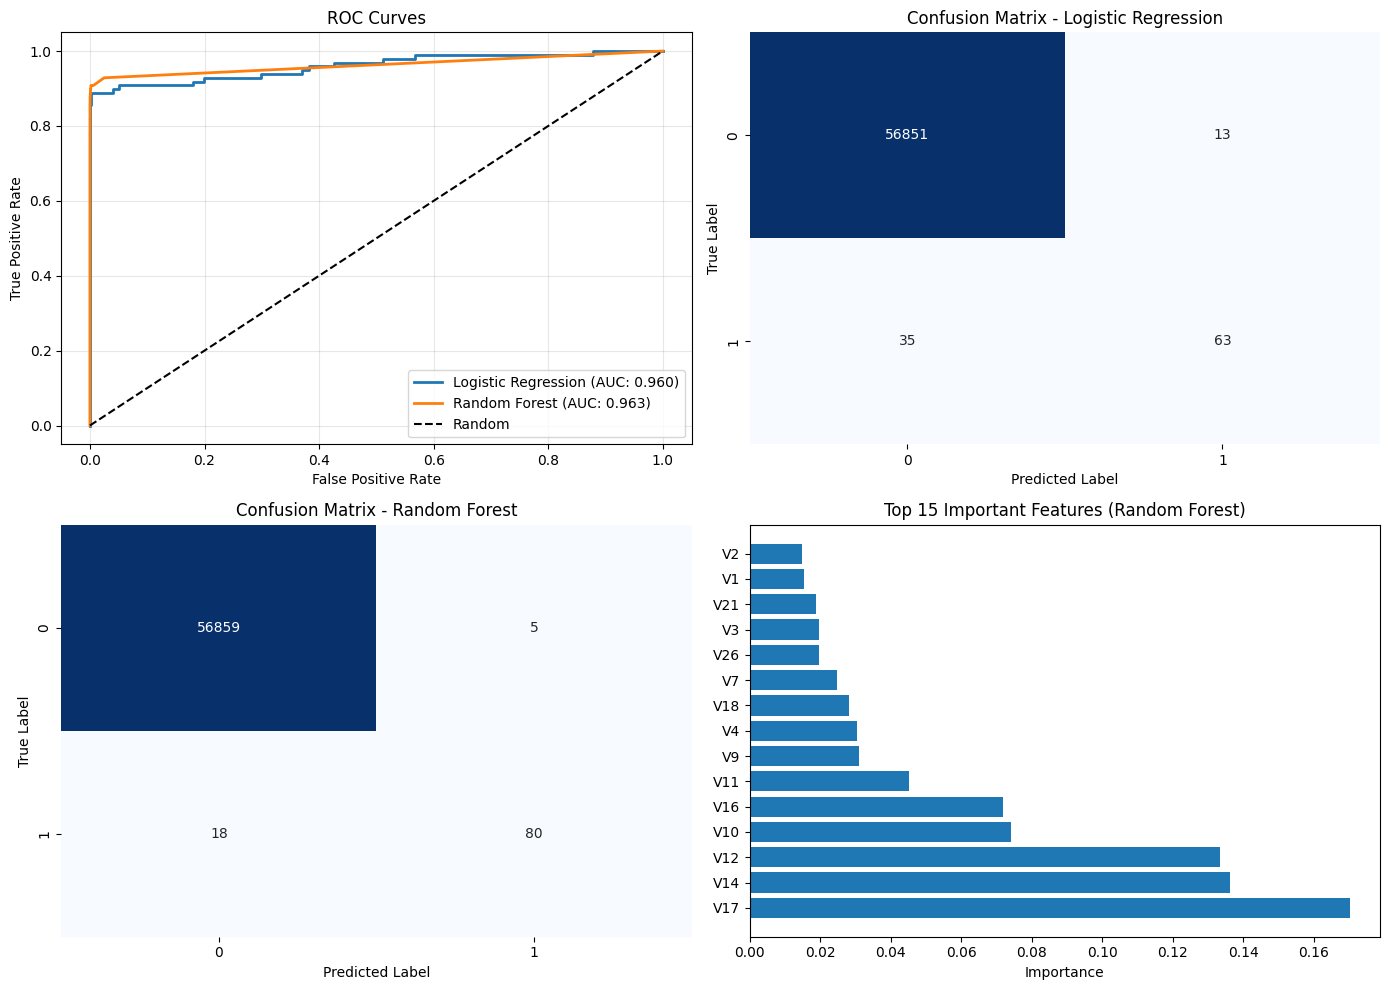

In [25]:
# Visualization of Model Performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

axes[0, 0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC: {roc_auc_score(y_test, y_pred_proba_lr):.3f})', linewidth=2)
axes[0, 0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC: {roc_auc_score(y_test, y_pred_proba_rf):.3f})', linewidth=2)
axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[0, 1], cmap='Blues', cbar=False)
axes[0, 1].set_title('Confusion Matrix - Logistic Regression')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[1, 0], cmap='Blues', cbar=False)
axes[1, 0].set_title('Confusion Matrix - Random Forest')
axes[1, 0].set_ylabel('True Label')
axes[1, 0].set_xlabel('Predicted Label')

# Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[1, 1].barh(feature_importance['feature'], feature_importance['importance'])
axes[1, 1].set_title('Top 15 Important Features (Random Forest)')
axes[1, 1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [29]:
# Model Persistence - Save Models for Deployment
import pickle
import os

# Create a models directory if it doesn't exist
models_dir = 'fraud_detection_models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Created directory: {models_dir}")

# Save Logistic Regression Model
lr_model_path = os.path.join(models_dir, 'logistic_regression_model.pkl')
with open(lr_model_path, 'wb') as f:
    pickle.dump(lr_model, f)
print(f"Logistic Regression model saved to: {lr_model_path}")

# Save Random Forest Model
rf_model_path = os.path.join(models_dir, 'random_forest_model.pkl')
with open(rf_model_path, 'wb') as f:
    pickle.dump(rf_model, f)
print(f"Random Forest model saved to: {rf_model_path}")

# Save StandardScaler (important for preprocessing new data)
scaler_path = os.path.join(models_dir, 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"StandardScaler saved to: {scaler_path}")

# Save Feature Names
feature_names_path = os.path.join(models_dir, 'feature_names.pkl')
with open(feature_names_path, 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print(f"Feature names saved to: {feature_names_path}")

# Save Model Metadata
metadata = {
    'lr_auc': roc_auc_score(y_test, y_pred_proba_lr),
    'rf_auc': roc_auc_score(y_test, y_pred_proba_rf),
    'lr_f1': f1_score(y_test, y_pred_lr),
    'rf_f1': f1_score(y_test, y_pred_rf),
    'test_fraud_rate': (y_test.sum() / len(y_test)) * 100,
    'train_fraud_rate': (y_train.sum() / len(y_train)) * 100,
    'n_features': len(X.columns),
    'num_features': len(X.columns),
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'model_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_path = os.path.join(models_dir, 'model_metadata.pkl')
with open(metadata_path, 'wb') as f:
    pickle.dump(metadata, f)
print(f"Model metadata saved to: {metadata_path}")

print("\n" + "="*60)
print("MODEL DEPLOYMENT SUMMARY")

print(f"\nAll models saved in: {os.path.abspath(models_dir)}/")
print(f"\nFiles created:")
print(f"  1. logistic_regression_model.pkl")
print(f"  2. random_forest_model.pkl")
print(f"  3. scaler.pkl (for data preprocessing)")
print(f"  4. feature_names.pkl (for feature validation)")
print(f"  5. model_metadata.pkl (model performance metrics)")
print(f"\nModel Performance:")
print(f"  - Logistic Regression AUC: {metadata['lr_auc']:.4f}")
print(f"  - Random Forest AUC: {metadata['rf_auc']:.4f}")
print(f"\nReady for deployment!")

Logistic Regression model saved to: fraud_detection_models\logistic_regression_model.pkl
Random Forest model saved to: fraud_detection_models\random_forest_model.pkl
StandardScaler saved to: fraud_detection_models\scaler.pkl
Feature names saved to: fraud_detection_models\feature_names.pkl
Model metadata saved to: fraud_detection_models\model_metadata.pkl

MODEL DEPLOYMENT SUMMARY

All models saved in: d:\credit card\archive (5)\fraud_detection_models/

Files created:
  1. logistic_regression_model.pkl
  2. random_forest_model.pkl
  3. scaler.pkl (for data preprocessing)
  4. feature_names.pkl (for feature validation)
  5. model_metadata.pkl (model performance metrics)

Model Performance:
  - Logistic Regression AUC: 0.9599
  - Random Forest AUC: 0.9630

Ready for deployment!


In [28]:
# Production Deployment Guide - How to Use Saved Models

# Example: Loading and using models in production
def load_fraud_detection_models():
    """Load all saved models and preprocessing objects"""
    import pickle
    import os
    
    models_dir = 'fraud_detection_models'
    
    with open(os.path.join(models_dir, 'logistic_regression_model.pkl'), 'rb') as f:
        lr_model_loaded = pickle.load(f)
    
    with open(os.path.join(models_dir, 'random_forest_model.pkl'), 'rb') as f:
        rf_model_loaded = pickle.load(f)
    
    with open(os.path.join(models_dir, 'scaler.pkl'), 'rb') as f:
        scaler_loaded = pickle.load(f)
    
    with open(os.path.join(models_dir, 'feature_names.pkl'), 'rb') as f:
        feature_names = pickle.load(f)
    
    with open(os.path.join(models_dir, 'model_metadata.pkl'), 'rb') as f:
        metadata = pickle.load(f)
    
    return lr_model_loaded, rf_model_loaded, scaler_loaded, feature_names, metadata

def predict_fraud(transaction_data, model_type='random_forest'):
    """
    Predict if a transaction is fraudulent
    
    Parameters:
    - transaction_data: pd.DataFrame with 30 features (V1-V28, Amount, Time)
    - model_type: 'logistic_regression' or 'random_forest'
    
    Returns:
    - prediction: 0 (Legitimate) or 1 (Fraudulent)
    - probability: Probability of fraud
    """
    lr_model_loaded, rf_model_loaded, scaler_loaded, feature_names, _ = load_fraud_detection_models()
    
    # Validate features
    if list(transaction_data.columns) != feature_names:
        print("Warning: Feature mismatch!")
    
    # Preprocess
    X_scaled = scaler_loaded.transform(transaction_data)
    
    # Predict
    if model_type == 'logistic_regression':
        prediction = lr_model_loaded.predict(X_scaled)
        probability = lr_model_loaded.predict_proba(X_scaled)[:, 1]
    else:  # random_forest
        prediction = rf_model_loaded.predict(X_scaled)
        probability = rf_model_loaded.predict_proba(X_scaled)[:, 1]
    
    return prediction[0], probability[0]

# Example usage
print("="*60)
print("PRODUCTION DEPLOYMENT EXAMPLE")

print("\n✓ Models successfully prepared for deployment!")
print("\nTo use in production:")
print("  1. Load models: lr_model, rf_model, scaler = load_fraud_detection_models()")
print("  2. Make predictions: prediction, prob = predict_fraud(new_transaction)")
print("\nFiles location: fraud_detection_models/")
print("\nRecommendation: Use Random Forest (higher AUC) for production")

PRODUCTION DEPLOYMENT EXAMPLE

✓ Models successfully prepared for deployment!

To use in production:
  1. Load models: lr_model, rf_model, scaler = load_fraud_detection_models()
  2. Make predictions: prediction, prob = predict_fraud(new_transaction)

Files location: fraud_detection_models/

Recommendation: Use Random Forest (higher AUC) for production
